In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## GCN

In [18]:
#gcn_res = pd.read_csv("../plots_data/GCN_Synthetic_new.csv")

In [19]:
df_gcn_cycles = pd.read_csv("../plots_data/GCN_Cycles_full.csv")
#df_gcn_cycles = gcn_res.loc[gcn_res.dataset=="Cycles",["depth","val_acc","test_acc"]]
df_gcn_necklaces = pd.read_csv("../plots_data/GCN_Necklaces_full.csv")
#df_gcn_necklaces = gcn_res.loc[gcn_res.dataset=="Necklaces",["depth","val_acc","test_acc"]]

df_gcn = {"Cycles":df_gcn_cycles, "Necklaces": df_gcn_necklaces}

In [20]:
df_gcn_cycles_mean = df_gcn_cycles.groupby(["min_cycle","depth"])["val_acc"].mean().reset_index().rename(columns = {"val_acc":"val_acc_mean"})
df_gcn_cycles_std = df_gcn_cycles.groupby(["min_cycle","depth"])["val_acc"].std().reset_index().rename(columns = {"val_acc":"val_acc_std"})

df_gcn_cycles_summary = df_gcn_cycles_mean.merge(df_gcn_cycles_std,how="left",on=["min_cycle","depth"])


df_gcn_necklaces_mean = df_gcn_necklaces.groupby(["depth"])["val_acc"].mean().reset_index().rename(columns = {"val_acc":"val_acc_mean"})
df_gcn_necklaces_std = df_gcn_necklaces.groupby(["depth"])["val_acc"].std().reset_index().rename(columns = {"val_acc":"val_acc_std"})

df_gcn_necklaces_summary = df_gcn_necklaces_mean.merge(df_gcn_necklaces_std,how="left",on=["depth"])

In [21]:
df_gcn_summary = {"Cycles":df_gcn_cycles_summary, "Necklaces": df_gcn_necklaces_summary}

In [22]:
df_list = []
for k in df_gcn_summary.keys():
    df = df_gcn_summary[k]
    df["dataset"] = k
    if k=="Cycles":
        df = df.loc[df.min_cycle==3]
    df_list.append(df)
pd.concat(df_list)[["dataset","depth","val_acc_mean","val_acc_std"]].to_csv("../plots_data/GCN_summary.csv",index=False)

## TopoGNN

In [23]:
#topognn_res = pd.read_csv("../plots_data/TopoGNN_Synthetic_new.csv")

In [24]:
df_topognn_cycles = pd.read_csv("../plots_data/TopoGNN_Cycles_full.csv")
#df_topognn_cycles = topognn_res.loc[topognn_res.dataset=="Cycles",["dim1","depth","val_acc","test_acc"]]

df_topognn_necklaces = pd.read_csv("../plots_data/TopoGNN_Necklaces_full.csv")
#df_topognn_necklaces = topognn_res.loc[topognn_res.dataset=="Necklaces",["dim1","depth","val_acc","test_acc"]]

df_topognn = {"Cycles":df_topognn_cycles, "Necklaces": df_topognn_necklaces}

In [25]:
df_topognn_cycles_mean = df_topognn_cycles.groupby(["fake","dim1","min_cycle","depth"])["val_acc"].mean().reset_index().rename(columns = {"val_acc":"val_acc_mean"})
df_topognn_cycles_std = df_topognn_cycles.groupby(["fake","dim1","min_cycle","depth"])["val_acc"].std().reset_index().rename(columns = {"val_acc":"val_acc_std"})

df_topognn_cycles_summary = df_topognn_cycles_mean.merge(df_topognn_cycles_std,how="left",on=["fake","dim1","min_cycle","depth"])


df_topognn_necklaces_mean = df_topognn_necklaces.groupby(["fake","dim1","depth"])["val_acc"].mean().reset_index().rename(columns = {"val_acc":"val_acc_mean"})
df_topognn_necklaces_std = df_topognn_necklaces.groupby(["fake","dim1","depth"])["val_acc"].std().reset_index().rename(columns = {"val_acc":"val_acc_std"})

df_topognn_necklaces_summary = df_topognn_necklaces_mean.merge(df_topognn_necklaces_std,how="left",on=["fake","dim1","depth"])

In [26]:
df_topognn_summary = {"Cycles":df_topognn_cycles_summary, "Necklaces": df_topognn_necklaces_summary}

In [27]:
df_list = []
for k in df_topognn_summary.keys():
    df = df_topognn_summary[k]
    df["dataset"] = k
    if k=="Cycles":
        df = df.loc[df.min_cycle==3]
    df_list.append(df)
pd.concat(df_list)[["dataset","depth","fake","dim1","val_acc_mean","val_acc_std"]].to_csv("../plots_data/TopoGNN_summary.csv",index=False)

## Plot routine

In [28]:
y_label = "val_acc"
linewidth = 2
dataset = "Cycles"
min_cycle = 3

def plot_subroutine(df,label):
    
    plt.plot(df["depth"].values, df[y_label+"_mean"],label=label,linewidth=linewidth)
    
    plt.fill_between(df["depth"].values,
                     df[y_label+"_mean"] - df[y_label+"_std"],
                     df[y_label+"_mean"] + df[y_label+"_std"],
                     linewidth=linewidth, alpha = 0.3)
    
    

def plot_routine(y_label, dataset, linewidth = 2, min_cycle = 3):

    df_gcn = df_gcn_summary[dataset]
    df_topognn = df_topognn_summary[dataset]
    
    if dataset=="Cycles":
        df_gcn = df_gcn.loc[df_gcn["min_cycle"]==min_cycle]
        df_topognn = df_topognn.loc[df_topognn["min_cycle"]==min_cycle]

    plot_subroutine(df_gcn,label="GCN")
    
    df_topo_dim1 = df_topognn.loc[(df_topognn.dim1==True)&(df_topognn.fake==False)]
    
    plot_subroutine(df_topo_dim1,label="TopoGNN")
    
    df_topo_dim0 = df_topognn.loc[(df_topognn.dim1==False)&(df_topognn.fake==False)]
    
    plot_subroutine(df_topo_dim0,label="TopoGNN (no dim1)")
    
    
    df_topo_dim1_fake = df_topognn.loc[(df_topognn.dim1==True)&(df_topognn.fake==True)]
    
    plot_subroutine(df_topo_dim1_fake,label="TopoGNN Fake")

    
    df_topo_dim0_fake = df_topognn.loc[(df_topognn.dim1==False)&(df_topognn.fake==True)]
    
    plot_subroutine(df_topo_dim0_fake,label="TopoGNN Fake (no dim1)")
    
    
    plt.xlabel("Number of layers")
    if y_label=="val_acc":
        plt.ylabel("Validation Accuracy")
    elif y_label=="test_acc":
        plt.ylabel("Validation Accuracy")
    else:
        raise("label not supported !")
    plt.title(f"Evolution of the performance with the number of layers - {dataset} dataset")
    plt.legend()
    plt.grid()
    plt.show()

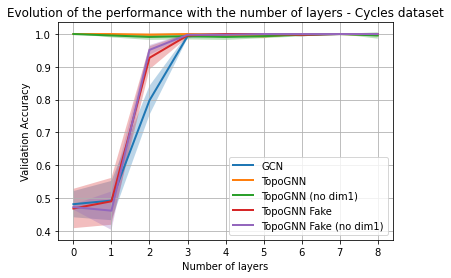

In [29]:
y_label = "val_acc"
linewidth = 2
dataset = "Cycles"
min_cycle = 3

plot_routine(y_label, dataset, linewidth, min_cycle)

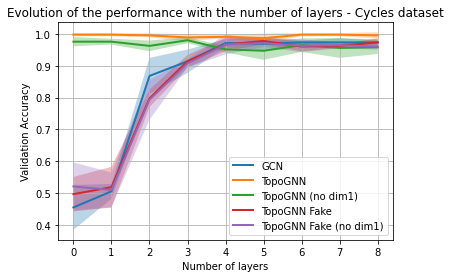

In [30]:
y_label = "val_acc"
linewidth = 2
dataset = "Cycles"
min_cycle = 4

plot_routine(y_label, dataset, linewidth, min_cycle)

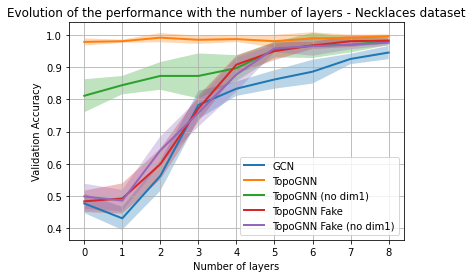

In [31]:
y_label = "val_acc"
linewidth = 2
dataset = "Necklaces"

plot_routine(y_label, dataset, linewidth)

In [32]:
df_topognn_necklaces.depth.unique()

array([0, 8, 7, 6, 5, 4, 3, 2, 1])